In [5]:
import numpy as np
import pandas as pd

df= pd.read_csv('Iris.csv')

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
print("Class Labels:", df['Species'].unique())

Class Labels: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [7]:
X=df.drop([ 'Species'], axis=1)
Y=df['Species']

**Step 2: Normalization (Feature Scaling)**

🔍 What are we doing?

We’re going to normalize (standardize) the feature values — i.e., scale them so they all have a similar range (mean = 0, std = 1).

🤔 Why do we need this in KNN?

KNN uses distance (usually Euclidean) to find nearest neighbors:
​
 
If one feature has a much larger scale (e.g., 0–1000) than others (e.g., 0–1), it will dominate the distance calculation — which leads to biased results.

✅ Standardizing ensures that all features contribute equally.

🛠️ How do we normalize?

We’ll use StandardScaler from sklearn.preprocessing:

Transforms data to mean = 0, std = 1

Common for most ML algorithms, including KNN

In [8]:
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# Fit on X and transform it
X_scaled = scaler.fit_transform(X)


In [9]:
# Before scaling
print("Before Scaling:")
print(X.describe())

# After scaling (convert back to DataFrame for inspection)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nAfter Scaling:")
print(X_scaled_df.describe())


Before Scaling:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

After Scaling:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000   1.500000e+02  1.500000e+02   1.500000e+02  1.500000e+02
mean     0.000000  -4.736952e-16 -6.631732e-16   3.315866e-16 -2.842171e-16
std      1.003350   1.003350e+00  1.003350e+00   1.00335

**Step 3: Train-Test Split**

 --What are we doing?

We’re splitting the dataset into:
Training set: used to "train" the model
Testing set: used to evaluate how well the model performs on unseen data

--Why do we need to split the data?

If we train and test on the same data:
We’ll get misleadingly high accuracy (called overfitting)
The model may not generalize to new/unseen data
Splitting helps us measure true performance by mimicking real-world scenarios.

--How do we split?

We’ll use train_test_split from sklearn.model_selection.
Typical split:
80% training
20% testing
We'll also use a random_state (e.g., 42) to ensure reproducibility (same split every time you run the code).

| Term              | Meaning                              |
| ----------------- | ------------------------------------ |
| `X_train`         | Features for training                |
| `X_test`          | Features for testing                 |
| `y_train`         | Labels for training                  |
| `y_test`          | Labels for testing                   |
| `test_size=0.2`   | 20% data reserved for testing        |
| `random_state=42` | Keeps results consistent across runs |


In [12]:
from sklearn.model_selection import train_test_split

# Use the scaled feature matrix X_scaled and labels y
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=42
)

# Optional: check the sizes
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 120
Testing set size: 30


**Step 4: Train the KNN Classifier**

--What are we doing?

We’re going to initialize a K-Nearest Neighbors model and fit it using our training data (X_train, y_train).

--Why are we doing this?

This is the core machine learning step:
We’re telling the model to "learn" from the training data.
In KNN, this doesn’t involve any actual learning (no weights or equations).
It just stores the training data and uses it during prediction by checking nearest neighbors.

That's why KNN is called a lazy learner.

--What’s happening inside KNN during training?

Unlike linear models or decision trees, KNN does not create a model.
It simply memorizes the training data.
During prediction, it calculates distance from the test point to all training points and picks the K nearest.

--How do we train it?

We’ll use KNeighborsClassifier from sklearn.neighbors.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifier with K=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model (actually, it stores the training data)
knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=3)

In [16]:
Y_pred = knn.predict(X_test)
print("Predictions:", Y_pred[:5])


Predictions: ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor']


**Step 5: Model Evaluation** 

--What are we doing?

We’ll evaluate the performance of our trained KNN model using:
Accuracy – how many predictions were correct
Confusion Matrix – how predictions are distributed across classes
Classification Report – gives precision, recall, F1-score per class

--Why are we doing this?

To measure the quality of our model. KNN might look good from a few predictions, but we need:
Metrics to quantify performance
Insights into what types of errors the model is making
This helps us tune K or improve data preprocessing if needed.

--How do we do it?

We’ll use:
accuracy_score – % of correct predictions
confusion_matrix – a table of true vs predicted labels
classification_report – precision, recall, f1-score

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Accuracy: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Evaluation Results Summary

✅ Accuracy: 1.0000
🎯 model correctly predicted 100% of the test samples.

✅ Confusion Matrix:

[[10  0  0]

 [ 0  9  0]
 
 [ 0  0 11]]

The matrix shows perfect predictions — all values lie on the diagonal, meaning:
All 10 Setosa samples predicted as Setosa
All 9 Versicolor samples predicted as Versicolor
All 11 Virginica samples predicted as Virginica

✅ No misclassifications — a dream result!

✅ Classification Report:
Class	Precision	Recall	F1-score	Support
Iris-setosa	1.00	1.00	1.00	10
Iris-versicolor	1.00	1.00	1.00	9
Iris-virginica	1.00	1.00	1.00	11

Precision = all predicted "Iris-setosa" were actually correct

Recall = all actual "Iris-setosa" were predicted correctly

F1-score = perfect balance between precision and recall

✅ All classes handled equally well.

✅ What does this mean?

Iris dataset is very well-behaved and linearly separable — so KNN with K=3 performs extremely well.
Still, it’s important to explore other values of K, because:
Real-world datasets aren't always this clean
You may encounter overfitting or underfitting

**Step 6: Experiment with Different K Values**

--What are we doing?

We’re testing different values of K (number of neighbors) to see how they affect the model’s performance.

--Why are we doing this?

The value of K controls the bias-variance tradeoff:
Small K (e.g., 1) → very sensitive to noise (low bias, high variance)
Large K (e.g., 15) → smoother predictions (high bias, low variance)
By plotting Accuracy vs K, we can find the optimal K for this dataset.

--How do we do it?

We’ll:
Loop through a range of K values
Train and evaluate a KNN model for each
Store the accuracy
Plot K vs Accuracy

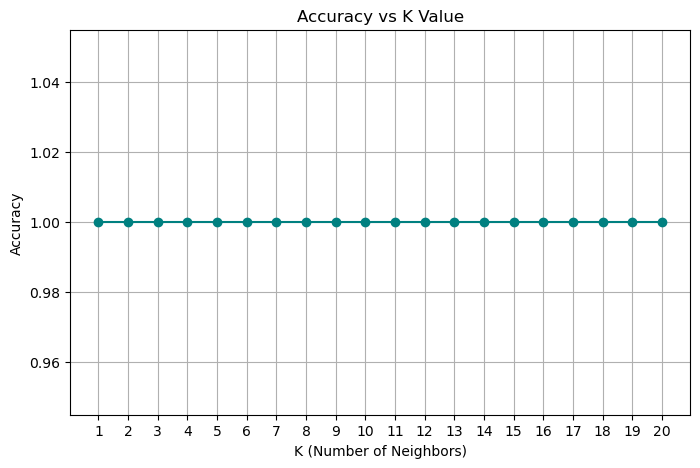

In [20]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Range of K values to test
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred_k = knn.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred_k)
    accuracies.append(acc)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='teal')
plt.xticks(k_values)
plt.title("Accuracy vs K Value")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


What This Means:

dataset is likely:
Perfectly clean and separable
Well-balanced
Not too large, so there’s no class overlap or noise

🔍 In short:

No matter how many neighbors you consider, the test samples are always surrounded by the correct class — resulting in perfect predictions.

⚠️ But a gentle reminder:

While this is great for learning, in real-life datasets:
We’ll usually see accuracy vary with K
There’s often an optimal K (neither too low nor too high)
WE may need cross-validation to choose best K more reliably



**Step 7: Visualize Decision Boundaries**

--What are we doing?

We're going to visualize how KNN separates different classes in a 2D feature space by plotting decision boundaries.

--Why are we doing this?

KNN is an instance-based learner, and its decision boundaries can be:
Wiggly or complex for small K (e.g., K=1)
Smoother for larger K (e.g., K=10)
By plotting:
You’ll see the regions each class occupies
Understand how KNN makes decisions
Visually compare different K values

--How do we do it?

Since we can only plot in 2D, we’ll:
Use only 2 features (like sepal length & sepal width)
Fit KNN on them
Use a meshgrid to plot predicted class for every point in space
Overlay actual data points

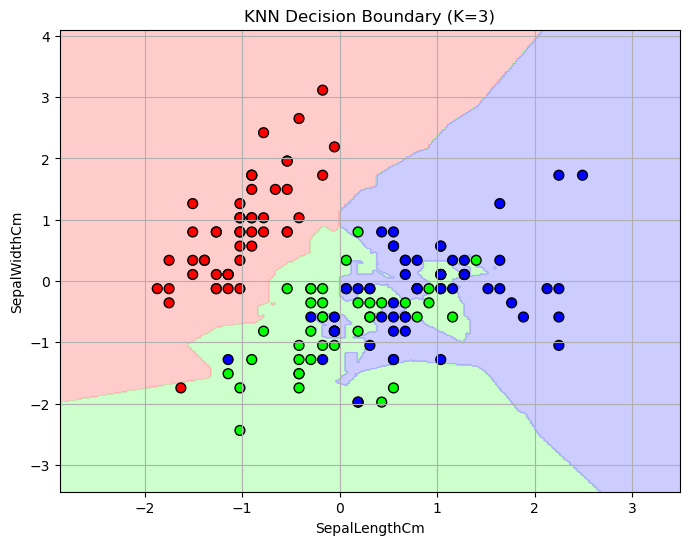

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select only 2 features (for 2D visualization)
features = ['SepalLengthCm', 'SepalWidthCm']  
X_vis = df[features]
y_vis = df['Species']

# Encode labels (if they are strings like 'setosa')
y_vis_encoded = y_vis.astype('category').cat.codes

# Normalize
scaler = StandardScaler()
X_vis_scaled = scaler.fit_transform(X_vis)

# Split
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis_scaled, y_vis_encoded, test_size=0.2, random_state=42
)

# Train KNN
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_vis, y_train_vis)

# Create meshgrid
h = 0.02
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for each point in grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis_encoded, cmap=cmap_bold, edgecolor='k', s=50)
plt.title(f"KNN Decision Boundary (K={k})")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.grid(True)
plt.show()


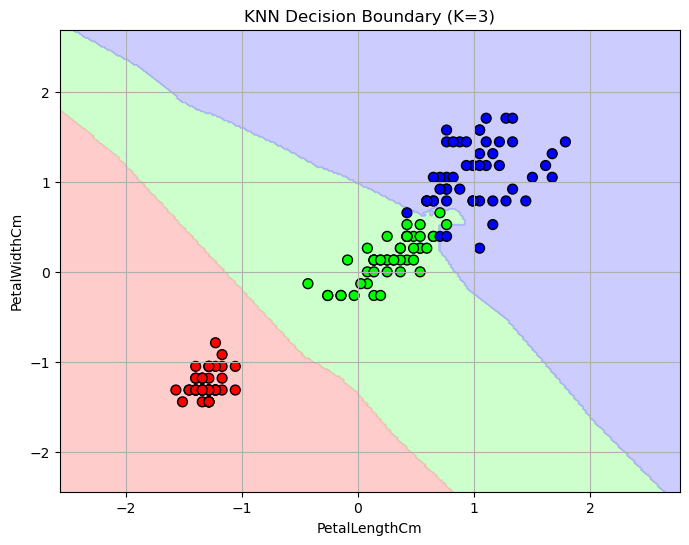

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select only 2 features (for 2D visualization)
features = ['PetalLengthCm', 'PetalWidthCm']  
X_vis = df[features]
y_vis = df['Species']

# Encode labels (if they are strings like 'setosa')
y_vis_encoded = y_vis.astype('category').cat.codes

# Normalize
scaler = StandardScaler()
X_vis_scaled = scaler.fit_transform(X_vis)

# Split
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis_scaled, y_vis_encoded, test_size=0.2, random_state=42
)

# Train KNN
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_vis, y_train_vis)

# Create meshgrid
h = 0.02
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for each point in grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis_encoded, cmap=cmap_bold, edgecolor='k', s=50)
plt.title(f"KNN Decision Boundary (K={k})")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.grid(True)
plt.show()
